<a href="https://colab.research.google.com/github/julialukomska70/JuliaLukomska-DataScience-GenAI-submission/blob/main/Copy_of_2_03_Calculated_Fields%2C_Indexing_and_Subsetting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=1xqQczl0FG-qtNA2_WQYuWePW9oU8irqJ)

# 2.03 Pandas: Calculated fields, indexing and subsetting dataframes
### Calculated Fields
In many forms of data analysis often we will want to generate new fields/columns based on existing data or as some combination of them. In other words, this is data that we are calculating rather than reading.

We will create some calculated fields based on the dictionary input from the last session. If you have started a new notebook run the below code to recreate the dataframe:

In [ ]:
import pandas as pd
import numpy as np

# create a dictionary of orders
orders = {'o10001':{'date':'2024/01/10', 'product':'Hoodie', 'quantity':'1'},
            'o10002':{'date':'2024/01/13', 'product':'Tote bag', 'quantity':'2'},
            'o10003':{'date':'2024/01/14', 'product':'Pencil', 'quantity':'10'},
            'o10004':{'date':'2024/01/15', 'product':'T-shirt', 'quantity':'2'}
}

# convert to a dataframe
orders_df = pd.DataFrame(orders)

# create a dicitonary of products
products = {'123':{'name':'Hoodie', 'cost_price':12.12, 'sale_price':15.00},
            '124':{'name':'Tote bag', 'cost_price':2.15, 'sale_price':9.99},
            '125':{'name':'Pencil', 'cost_price':22.45, 'sale_price':49.99},
            '126':{'name':'T-shirt', 'cost_price':0.45, 'sale_price':2.99},
            '127':{'name':'Honours degree', 'cost_price':0.78, 'sale_price':1.49}
}

# convert to a dataframe
products_df = pd.DataFrame(products)

# transpose (flip on their axes) both dataframes
orders_df = orders_df.transpose()
products_df = products_df.transpose()

# join (left) orders_df and products_df
joined_df = orders_df.merge(products_df, how='left', left_on='product', right_on='name')

# drop the repeated column and display on screen
joined_df = joined_df.drop(['name'], axis=1)
joined_df

,date,product,quantity,cost_price,sale_price
0,2024/01/10,Hoodie,1,12.12,15.0
1,2024/01/13,Tote bag,2,2.15,9.99
2,2024/01/14,Pencil,10,22.45,49.99
3,2024/01/15,T-shirt,2,0.45,2.99


Expanding our example, we now want to know the total cost price and total sale price for each order, calculated by multiplying the unity prices by the quantity. Again, pandas makes this relatively easy to do … in theory at least. The following code would calculate, working much like a normal calculation on a single variable (as opposed to a whole column):

In [ ]:
field_list = ['quantity', 'cost_price', 'sale_price']
for field in field_list:
    joined_df[field] = joined_df[field].astype(float)

joined_df['total_cost_price'] = joined_df['quantity'] * joined_df['cost_price']
joined_df['total_sale_price'] = joined_df['quantity'] * joined_df['sale_price']
joined_df

,date,product,quantity,cost_price,sale_price,total_cost_price,total_sale_price
0,2024/01/10,Hoodie,1.0,12.12,15.00,12.12,15.00
1,2024/01/13,Tote bag,2.0,2.15,9.99,4.30,19.98
2,2024/01/14,Pencil,10.0,22.45,49.99,224.50,499.90
3,2024/01/15,T-shirt,2.0,0.45,2.99,0.90,5.98


Uh-oh ... error. More specifically the message "TypeError: can't multiply sequence by non-int of type 'float'". Although the description is a little technical, we can get the gist of the problem - there is some form of "type" error preventing the multiplication. Let's therefore evaluate what data types we have in our dataframe using a print statement:

In [ ]:
print(joined_df.dtypes)

date                 object
product              object
quantity            float64
cost_price          float64
sale_price          float64
total_cost_price    float64
total_sale_price    float64
dtype: object


We would want our quantity, cost_price and sale_price to be of a numeric type (float or integer). In this case everything is listed as an "object". Object is pandas' most flexible data type (dtype) designed to work with "text or mixed numeric and non-numeric values". While pandas will try to infer the relevant type for data, the fallback option is to assign as object which is what has happened here. However, we can fix this fairly easily with a for loop that converts the relevant fields to floats. An alternative approach, particularly when you have many columns of data, is to ask pandas to convert them as a set using convert_dtypes (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.convert_dtypes.html).

In [ ]:
field_list = ['quantity', 'cost_price', 'sale_price']
for field in field_list:
    joined_df[field] = joined_df[field].astype(float)

To explain what we are doing here.
1. First, we have created a list of the fields (columns) we want to change ('quantity', 'cost_price' and 'sale_price') called field_list.
2. Secondly we have created a __for__ loop that iterates through this list.
3. For each of the records in _joined\_df_ we index (you\'ll see this below) the dataframe by that particular field. I.e. we'll find that particular field.
4. Lastly, we change the __type__ of that dataitem from "object" (i.e. a __string__) to "float" (i.e. a decimal number).

With this in place we can run the earlier code without error:

In [ ]:
joined_df['total_cost_price'] = joined_df['quantity'] * joined_df['cost_price']
joined_df['total_sale_price'] = joined_df['quantity'] * joined_df['sale_price']
joined_df

,date,product,quantity,cost_price,sale_price,total_cost_price,total_sale_price
0,2024/01/10,Hoodie,1.0,12.12,15.00,12.12,15.00
1,2024/01/13,Tote bag,2.0,2.15,9.99,4.30,19.98
2,2024/01/14,Pencil,10.0,22.45,49.99,224.50,499.90
3,2024/01/15,T-shirt,2.0,0.45,2.99,0.90,5.98


### Indexing and Subsetting Dataframes
As with strings and lists, we can index/slice pandas dataframes based on a range of criteria. Note, this is an area where the recommended pandas syntax has changed significantly over the years. In the past .ix (index) was the preferred syntax, and you will still often see this in older libraries/tutorials. Today, however, _.loc_ (location) and _.iloc_ (index location) are the prefered options and the ones we will use here. We will start by indexing item zero (the first item) in our dataframe:

In [ ]:
joined_df.iloc[0]

,0
date,2024/01/10
product,Hoodie
quantity,1.0
cost_price,12.12
sale_price,15.0
total_cost_price,12.12
total_sale_price,15.0


Although the command is slightly different than when working with strings and lists, the principles remain the same, and it is also possible to use slices here by including a colon:

In [ ]:
joined_df.iloc[0:2]

,date,product,quantity,cost_price,sale_price,total_cost_price,total_sale_price
0,2024/01/10,Hoodie,1.0,12.12,15.00,12.12,15.00
1,2024/01/13,Tote bag,2.0,2.15,9.99,4.30,19.98


We can view specific columns by calling them by name. Note, we used this feature in our earlier for loop to change dtypes.

In [ ]:
joined_df['product']

,product
0,Hoodie
1,Tote bag
2,Pencil
3,T-shirt


The same techniques can also be used to create subsets of the data:

In [ ]:
df_subset_one = joined_df.iloc[0:2]
df_subset_one

,date,product,quantity,cost_price,sale_price,total_cost_price,total_sale_price
0,2024/01/10,Hoodie,1.0,12.12,15.00,12.12,15.00
1,2024/01/13,Tote bag,2.0,2.15,9.99,4.30,19.98


In [ ]:
df_subset_two = joined_df[['product', 'quantity', 'total_sale_price']]
df_subset_two

,product,quantity,total_sale_price
0,Hoodie,1.0,15.00
1,Tote bag,2.0,19.98
2,Pencil,10.0,499.90
3,T-shirt,2.0,5.98


In [ ]:
df_subset_less_than_20 = joined_df[joined_df['total_sale_price'] < 20.00]
df_subset_less_than_20

,date,product,quantity,cost_price,sale_price,total_cost_price,total_sale_price
0,2024/01/10,Hoodie,1.0,12.12,15.00,12.12,15.00
1,2024/01/13,Tote bag,2.0,2.15,9.99,4.30,19.98
3,2024/01/15,T-shirt,2.0,0.45,2.99,0.90,5.98


In [ ]:
df_subset_less_than_20 = joined_df[joined_df['total_sale_price'] < 20.00]
df_subset_less_than_20

,date,product,quantity,cost_price,sale_price,total_cost_price,total_sale_price
0,2024/01/10,Hoodie,1.0,12.12,15.00,12.12,15.00
1,2024/01/13,Tote bag,2.0,2.15,9.99,4.30,19.98
3,2024/01/15,T-shirt,2.0,0.45,2.99,0.90,5.98


Note that subsetting by rows follows the normal Python convention where the first number is the first item to return and the second is the value after the last item to return. Subsetting by columns requires a double set of square brackets (e.g. [['a', 'b', 'c']]).

### Exporting Dataframes
Finally, we can use Pandas to efficiently export our Dataframe to file. There are multiple export options available, see the documentation for more details: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#conversion, to include Excel, many major databases, and even HTML. However, typically the most useful is to CSV (for reusability):

In [ ]:
joined_df.to_csv('Joined_Dataframe.csv', sep=",")

Note the sep="," denotes that the columns will be sepearated by a comma - hence the file type CSV (Comma Separated Values). Click on the folder icon on the left to download and check your file.

### EXERCISES
1. Using _product\_df_, can you create a calculated field for the amount of markup associated with each product? The formula for this should be:
$markup = \frac{(sale \hspace{0.1cm} price \hspace{0.2cm} - \hspace{0.2cm} cost \hspace{0.2cm} price)}{cost \hspace{0.1cm} price}$

2. Working this time with _joined\_df_, can you create a subset of the dataframe where the total sale price is less than £20.00?

In [ ]:
field_list_products = ['cost_price', 'sale_price']
for field in field_list_products:
    products_df[field] = products_df[field].astype(float)

In [ ]:
products_df['markup'] = (products_df['sale_price'] - products_df['cost_price']) / products_df['cost_price']
products_df

,name,cost_price,sale_price,markup
123,Hoodie,12.12,15.00,0.237624
124,Tote bag,2.15,9.99,3.646512
125,Pencil,22.45,49.99,1.226726
126,T-shirt,0.45,2.99,5.644444
127,Honours degree,0.78,1.49,0.910256


In [ ]:
print(products_df['markup'].describe())

count    5.000000
mean     2.333112
std      2.254419
min      0.237624
25%      0.910256
50%      1.226726
75%      3.646512
max      5.644444
Name: markup, dtype: float64


The standard deviation (std) is 2.25, which is quite high compared to the mean of 2.33. This suggests a massive disparity in profit margins across the product line.

With a minimum markup of ~23% and a maximum of ~564%, the repository now reveals which products are "commodities" (low margin) versus "premium" (high margin).

Let's visualize the distribution of the 'markup' column:

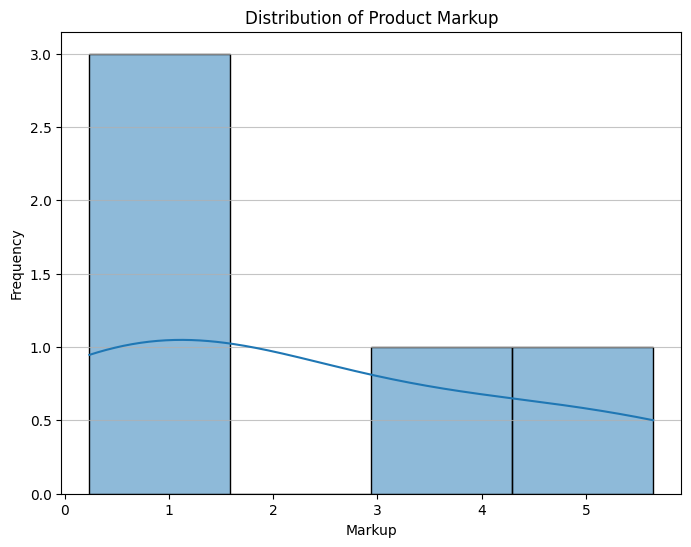

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(products_df['markup'], kde=True)
plt.title('Distribution of Product Markup')
plt.xlabel('Markup')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

The ability to create calculated fields and subsets allows you to ask more complex questions of your data. As you no longer just look at a list of names and ages. you now analyse the profitability and viability of a business model.

Looking at the quartiles (75% at 3.64), it appears the majority of thr products have healthy margins. However, the items in the "under £20" subset will likely be the ones I would want to target for "Upselling" or "Bundling" strategies to increase the average order value.